# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    labels = {'0':'alt.atheism', '1':'comp.graphics', '2':'sci.space', '3':'talk.religion.misc'}
    for i in range(num_examples):
        print("Example No.", i+1)
        print("Label:", train_labels[i], "-", labels[str(train_labels[i])])
        print("Message:\n", train_data[i])
        print("="*70)

### STUDENT END ###
P1(5)

Example No. 1
Label: 1 - comp.graphics
Message:
 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
Example No. 2
Label: 3 - talk.religion.misc
Message:
 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstr

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
def P2a():
### STUDENT START ###
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    row, col = X.shape
    print("Size of vocabulary:", col)
    print("Average number of non-zero features per example:", X.nnz/row)
    print("Fraction of the entries in the matrix are non-zero:", X.nnz/(row*col))

### STUDENT END ###
P2a()

Size of vocabulary: 26879
Average number of non-zero features per example: 96.70599803343165
Fraction of the entries in the matrix are non-zero: 0.0035978272269590263


In [5]:
def P2b():
### STUDENT START ###
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    print("The 0th feature string:", vectorizer.get_feature_names()[0])
    print("The last feature string:", vectorizer.get_feature_names()[-1])
    
### STUDENT END ###
P2b()

The 0th feature string: 00
The last feature string: zyxel


In [6]:
def P2c():
### STUDENT START ###
    vocabulary = ["atheism", "graphics", "space", "religion"]
    vectorizer = CountVectorizer(vocabulary=vocabulary)
    X = vectorizer.fit_transform(train_data)
    row, col = X.shape
    print("Size of training vector:", X.shape)
    print("Average number of non-zero features per example:", X.nnz/row)
    print("Fraction of the entries in the matrix are non-zero:", X.nnz/(row*col))

### STUDENT END ###
P2c()

Size of training vector: (2034, 4)
Average number of non-zero features per example: 0.26843657817109146
Fraction of the entries in the matrix are non-zero: 0.06710914454277286


In [7]:
def P2d():
### STUDENT START ###
    bigram_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
    X1 = bigram_vectorizer.fit_transform(train_data)
    print("Size of vocabulary for bigram extraction:", X1.shape[1])
    trigram_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
    X2 = trigram_vectorizer.fit_transform(train_data)
    print("Size of vocabulary for trigram extraction:", X2.shape[1])

### STUDENT END ###
P2d()

Size of vocabulary for bigram extraction: 194891
Size of vocabulary for trigram extraction: 315692


> <font color=red> The analyzer needs to be "char", rather than "word".</font>

In [8]:
def P2e():
### STUDENT START ###
    vectorizer = CountVectorizer(min_df=10)
    X = vectorizer.fit_transform(train_data)
    print("Size of vocabulary after pruning words that appear in fewer than 10 documents:", X.shape[1])

### STUDENT END ###
P2e()

Size of vocabulary after pruning words that appear in fewer than 10 documents: 3064


In [9]:
def P2f():
### STUDENT START ###
    td_data = train_data + dev_data
    vectorizer = CountVectorizer()
    # Get a unique vocabulary based off train_data
    X_train = vectorizer.fit_transform(train_data)
    # Get a unique vocabulary based off dev_data
    X_dev = vectorizer.fit_transform(dev_data)
    # Get a unique vocabulary based off both train_data and dev_data
    X_train_dev = vectorizer.fit_transform(td_data)
    
    # The unique words in dev that are missing in training vocabulary would be the difference
    diff = X_train_dev.shape[1] - X_train.shape[1]
    # Print out the absolute number of missing words
    print("Number of words in the dev data are missing from the training vocabulary:", diff)
    # The fraction is calculated by number of missing words divided by size of dev vocabulary
    print("Fraction of words in the dev data are missing from the training vocabulary:", diff / X_dev.shape[1])

### STUDENT END ###
P2f()

Number of words in the dev data are missing from the training vocabulary: 4027
Fraction of words in the dev data are missing from the training vocabulary: 0.24787640034470024


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [10]:
def P3():
### STUDENT START ###
    # Feature extraction using default CountVectorizer
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    
    ### Model 1: K nearest neighbors classifier
    print("Model 1: K nearest neighbors classifier")
    print("-"*70)
    # Use GridSearchCV to find best n_neighbors
    model1 = KNeighborsClassifier()
    neighbors = {'n_neighbors': range(1,120,2)} # use odd numbers as n_neighbors
    grid1 = GridSearchCV(estimator=model1, param_grid=neighbors, cv=5)
    grid1.fit(X_train, train_labels)
    
    # Create a kNN model with best n_neighbors
    best_neighbors = grid1.best_estimator_.n_neighbors
    best_model1 = KNeighborsClassifier(n_neighbors=best_neighbors)
    best_model1.fit(X_train, train_labels)
    model1_preds = best_model1.predict(X_dev)
    
    # summarize the results of the grid search
    print("N_neighbors for evaluation: range(1,120,2)")
    print("The best n_neighbors:", best_neighbors)
    print("F1 score using the best n_neighbors:", metrics.f1_score(dev_labels, model1_preds, average='micro'))
    
#     for i in range(1,15,2):
#         model1 = KNeighborsClassifier(n_neighbors=i)
#         model1.fit(X_train, train_labels)
#         model1_preds = model1.predict(X_dev)
#         print("F1 score for KNN model with k =", i, "is", 
#               metrics.f1_score(dev_labels, model1_preds, average='micro'))
    print("="*70 + "\n")
    
    ### Model 2: Multinomial Naive Bayes model
    print("Model 2: Multinomial Naive Bayes model")
    print("-"*70)
    # Use GridSearchCV to find best alpha
    model2 = MultinomialNB()
    alphas = {'alpha': [0.0000000001,0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    grid2 = GridSearchCV(estimator=model2, param_grid=alphas, cv=5)
    grid2.fit(X_train, train_labels)
    
    # Create a MultinomialNB model with best alpha
    best_alpha = grid2.best_estimator_.alpha
    best_model2 = MultinomialNB(alpha=best_alpha)
    best_model2.fit(X_train, train_labels)
    model2_preds = best_model2.predict(X_dev)
    
    # summarize the results of the grid search
    print("Alphas for evaluation:",alphas['alpha'])
    print("The best alpha:", best_alpha)
    print("F1 score using the best alpha:", metrics.f1_score(dev_labels, model2_preds, average='micro'))
    print("="*70 + "\n")
    
    ### Model 3: Logistic regression model
    print("Model 3: Logistic regression model")
    print("-"*70)
    c_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    for i in c_values:
        model3 = LogisticRegression(C=i, penalty='l2', solver='liblinear', multi_class='auto')
        model3.fit(X_train, train_labels)
        model3_preds = model3.predict(X_dev)

        print("F1 score of model with C =", i, "is", 
              metrics.f1_score(dev_labels, model3_preds, average='micro'))
        print("Sum of the squared weight values for each class:")
        print("Class 0:", np.sum(model3.coef_[0]**2))
        print("Class 1:", np.sum(model3.coef_[1]**2))
        print("Class 2:", np.sum(model3.coef_[2]**2))
        print("Class 3:", np.sum(model3.coef_[3]**2), "\n")
    print("="*70 + "\n")

### STUDENT END ###
P3()

Model 1: K nearest neighbors classifier
----------------------------------------------------------------------
N_neighbors for evaluation: range(1,120,2)
The best n_neighbors: 113
F1 score using the best n_neighbors: 0.48372781065088755

Model 2: Multinomial Naive Bayes model
----------------------------------------------------------------------
Alphas for evaluation: [1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
The best alpha: 0.01
F1 score using the best alpha: 0.7795857988165681

Model 3: Logistic regression model
----------------------------------------------------------------------
F1 score of model with C = 0.001 is 0.6375739644970414
Sum of the squared weight values for each class:
Class 0: 0.16509345166829323
Class 1: 0.20095274690582257
Class 2: 0.1806709375439649
Class 3: 0.18724278437849426 

F1 score of model with C = 0.01 is 0.6789940828402367
Sum of the squared weight values for each class:
Class 0: 2.5414784670795845
Class 1: 2.9397093683564717
Class 2: 2.86246

> **ANSWER**:

> **a. Why doesn't nearest neighbors work well for this problem?**
   - The feature dimensions (vocabulary) in our case are high, which makes distance measuring hard. All neighbors converge so close that it is tricky to clearly identify nearest versus farthest neighbors. 
   - <font color=red> Feature dimensions is much larger than data size which could skew towards unimportant features.</font>
        
> **b. Any ideas why logistic regression doesn't work as well as Naive Bayes?**
   - Naive Bayes works good in domains with many equally important features. The main assumption behind the naive bayes model is that each feature $x_i$ is conditionally independent of all other features given the class. This assumption is naive and basically impossible to meet, however, it helps the naive bayes model generalize well and works well in high dimension. Instead of learning and estimating a complicated, high dimensional distribution: $P(x_1, x_2, ..., x_n, c)$ in which all of the features are jointly distributed, the model can be trained by estimating $P(x_1, c)$, $P(x_2, c)$, ..., $P(x_n, c)$.
   - It also works good in case of small data size. General ML algorithms require $2^k$ data points to perform well versus Naive Bayes requires only $k$.
        
> **c. Briefly explain the relationship between the sum and the value of C.**
   - The sum increases as the value C increases. C is the inverse of Lambda regulator, which means, lowering C would increase Lambda regulator strength. Increasing the regularization strength penalizes "large" weight coefficients so that the model can improve its generalization performance. 
        

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [11]:
# Import pandas to create a dataframe
import pandas as pd

In [12]:
def P4():
### STUDENT START ###
    ### Unigram feature extraction
    print("Coefficients for Unigram features:")
    # Feature extraction using default CountVectorizer
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    
    # Train a Logistic Regression model
    # Use the best C identified in previous problem
    model1 = LogisticRegression(multi_class='auto')  
    model1.fit(X_train, train_labels)
    
    # Create a dataframe to record the features and their weights
    coef = pd.DataFrame(model1.coef_).T
    coef.index = vectorizer.get_feature_names()
    coef.columns = ['0: alt.atheism', '1: comp.graphics', 
                    '2: sci.space', '3: talk.religion.misc']
    class0 = coef.sort_values('0: alt.atheism', ascending=False).head()
    class1 = coef.sort_values('1: comp.graphics', ascending=False).head()
    class2 = coef.sort_values('2: sci.space', ascending=False).head()
    class3 = coef.sort_values('3: talk.religion.misc', ascending=False).head()
    weight_tbl1 = pd.concat([class0, class1, class2, class3])
    display(weight_tbl1)
    
    ### Bigram feature extraction
    print("="*70)
    print("Coefficients for bigram features:")
    # Feature extraction using bigram CountVectorizer
    bi_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
    X_train_bi = bi_vectorizer.fit_transform(train_data)
    
    # Train a Logistic Regression model
    model2 = LogisticRegression(multi_class='auto')  
    model2.fit(X_train_bi, train_labels)
    
    # Create a dataframe to record the features and their weights
    coef2 = pd.DataFrame(model2.coef_).T
    coef2.index = bi_vectorizer.get_feature_names()
    coef2.columns = ['0: alt.atheism', '1: comp.graphics', 
                     '2: sci.space', '3: talk.religion.misc']
    class0 = coef2.sort_values('0: alt.atheism', ascending=False).head()
    class1 = coef2.sort_values('1: comp.graphics', ascending=False).head()
    class2 = coef2.sort_values('2: sci.space', ascending=False).head()
    class3 = coef2.sort_values('3: talk.religion.misc', ascending=False).head()
    weight_tbl2 = pd.concat([class0, class1, class2, class3])
    display(weight_tbl2)

### STUDENT END ###
P4()

Coefficients for Unigram features:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0: alt.atheism,1: comp.graphics,2: sci.space,3: talk.religion.misc
deletion,1.124968,-0.398207,-0.420381,-0.395625
atheists,1.029070,-0.097349,-0.320551,-0.835084
bobby,0.990264,-0.220798,-0.340716,-0.463362
religion,0.954142,-0.616940,-0.792408,-0.064310
atheism,0.939212,-0.410345,-0.449329,-0.434545
graphics,-0.758767,1.936978,-1.335975,-0.762725
image,-0.582242,1.346790,-0.825897,-0.469007
file,-0.334763,1.266681,-0.806439,-0.626582
3d,-0.359192,1.124961,-0.702097,-0.378630
computer,0.143345,0.978129,-0.681911,-0.486985


Coefficients for bigram features:


,0: alt.atheism,1: comp.graphics,2: sci.space,3: talk.religion.misc
claim that,0.771669,-0.257726,-0.352086,-0.200642
was just,0.677629,-0.192939,-0.197961,-0.302005
cheers kent,0.649141,-0.882369,-0.821927,0.601474
look up,0.633800,-0.238289,-0.195135,-0.170545
you are,0.569416,-0.318518,-0.577068,0.000734
looking for,-0.755597,1.319612,-0.613634,-0.699886
comp graphics,-0.379822,1.037220,-0.470813,-0.396645
in advance,-0.544994,0.972281,-0.531006,-0.507319
is there,-0.428484,0.912645,-0.568743,-0.341453
out there,-0.324286,0.896346,-0.577907,-0.332930


> **ANSWER**: (1) While some vocabularies in unigram feature extraction seem to be relevant to the classes, most vocabularies in bigram extraction are just common expressions and irrelevant to the target classes. (2) For unigram, 'fbi', 'bobby' are not expected; for bigram, 'chears kent', 'the fbi', 'sherzer methodology' are not expected.

> <font color=red> The coef in bigram are smaller than the unigram which means unigram is more discriminative than bigram. </font>

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [13]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    # Lower case everything
    s = s.lower()

    # Replace sequences of numbers with a single token
    s = re.sub('[0-9]+', '0', s)

    # Remove various other non-letter characters
    s = re.sub('[‘!“#$%&\‘()*+,-./:;<=>?@[\\]^_`{|}~’]', "", s)

    # Remove adverbs
    s = re.sub(r'\w+ly', lambda x: x.group(0)[:-2], s)
    
#     # Shorten long words: words longer than 15 will be truncated
#     word_list = s.split(" ")
#     short_word_list = [word if len(word) < 16 else word[:16] + '..' for word in word_list]
#     s = ' '.join(short_word_list)
    
    return s

### STUDENT END ###

def P5():
### STUDENT START ###
    ### 1. No preprocessor
    print("1. Features extraction with default None preprocessor:")
    print("-"*70)
    vectorizer1 = CountVectorizer()
    X1_train = vectorizer1.fit_transform(train_data)
    print("Size of vocabulary:", X1_train.shape[1])
    X1_dev = vectorizer1.transform(dev_data)
    
    # Train a Logistic Regression model
    model1 = LogisticRegression(C=0.5, penalty='l2', solver='liblinear',multi_class='auto')  
    model1.fit(X1_train, train_labels)
    model1_preds = model1.predict(X1_dev)
    model1_score = metrics.f1_score(dev_labels, model1_preds, average='micro')
    print("F1 score:", model1_score)
    print("*"*70 + '\n')
    
    ### 2. Empty preprocessor
    print("2. Features extraction with empty preprocessor:")
    print("-"*70)
    vectorizer2 = CountVectorizer(preprocessor=empty_preprocessor, stop_words='english')
    X2_train = vectorizer2.fit_transform(train_data)
    print("Size of vocabulary:", X2_train.shape[1])
    X2_dev = vectorizer2.transform(dev_data)
    
    # Train a Logistic Regression model
    model2 = LogisticRegression(C=0.5, penalty='l2', solver='liblinear',multi_class='auto')  
    model2.fit(X2_train, train_labels)
    model2_preds = model2.predict(X2_dev)
    model2_score = metrics.f1_score(dev_labels, model2_preds, average='micro')
    print("F1 score:", model2_score)
    print("*"*70 + '\n')
    
    ### 3. Better preprocessor
    print("3. Features extraction with customized better preprocessor:")
    print("-"*70)
    vectorizer3 = CountVectorizer(preprocessor=better_preprocessor, stop_words='english')
    X3_train = vectorizer3.fit_transform(train_data)
    print("Size of vocabulary:", X3_train.shape[1])
    X3_dev = vectorizer3.transform(dev_data)
    
    # Train a Logistic Regression model
    model3 = LogisticRegression(C=0.5, penalty='l2', solver='liblinear',multi_class='auto')  
    model3.fit(X3_train, train_labels)
    model3_preds = model3.predict(X3_dev)
    model3_score = metrics.f1_score(dev_labels, model3_preds, average='micro')
    print("F1 score:", model3_score)
    print("*"*70 + '\n')
    
    # Print comparison
    print("4. Comparing better preprocessor with default none preprocessor:")
    print("-"*70)
    print("Reduced vocabulary size:", X1_train.shape[1] - X3_train.shape[1])
    print("Improved F1 score:", model3_score - model1_score)
    print("*"*70 + '\n')
    
    print("5. Comparing better preprocessor with empty preprocessor:")
    print("-"*70)
    print("Reduced vocabulary size:", X2_train.shape[1] - X3_train.shape[1])
    print("Improved F1 score:", model3_score - model2_score)
    print("*"*70 + '\n')
    
    
### STUDENT END ###
P5()

1. Features extraction with default None preprocessor:
----------------------------------------------------------------------
Size of vocabulary: 26879
F1 score: 0.7159763313609467
**********************************************************************

2. Features extraction with empty preprocessor:
----------------------------------------------------------------------
Size of vocabulary: 32993
F1 score: 0.7174556213017751
**********************************************************************

3. Features extraction with customized better preprocessor:
----------------------------------------------------------------------
Size of vocabulary: 26102
F1 score: 0.7337278106508875
**********************************************************************

4. Comparing better preprocessor with default none preprocessor:
----------------------------------------------------------------------
Reduced vocabulary size: 777
Improved F1 score: 0.017751479289940808
**************************************

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

Size of baseline vocabulary before pruning zero-weight features: 26879


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,C_parameter,L1_nonzero_weights,L2_nonzero_weights,Pruned_vocabulary_size,F1_score
0,0.001,5,107516,2,0.341716
1,0.010,36,107516,17,0.476331
2,0.100,363,107516,208,0.678994
3,0.500,1246,107516,743,0.670118
4,1.000,1853,107516,1095,0.674556
5,2.000,2929,107516,1745,0.695266
6,10.000,4970,107516,2620,0.689349
7,50.000,13069,107516,5810,0.704142
8,100.000,17608,107516,7498,0.677515
9,200.000,26223,107516,10884,0.698225


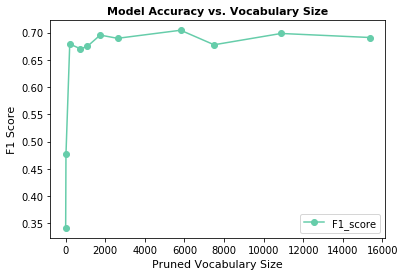

In [14]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    # Construct an empty dataframe to store results
    C_list = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 50.0, 100.0, 200.0, 300.0]
    df = pd.DataFrame({'C_parameter': C_list,
                       'L1_nonzero_weights':[0 for x in range(len(C_list))],
                       'L2_nonzero_weights':[0 for x in range(len(C_list))],
                       'Pruned_vocabulary_size':[0 for x in range(len(C_list))],
                       'F1_score':[0.0 for x in range(len(C_list))]})
    
    # Feature extraction using the default CountVectorizer
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    print("Size of baseline vocabulary before pruning zero-weight features:", X_train.shape[1])
    
    for i in range(len(C_list)):
        ### 1. Train a Logistic Regression model using L1 penalty, input C parameter
        model1 = LogisticRegression(penalty='l1', multi_class='auto', C=C_list[i], tol=.01)  
        model1.fit(X_train, train_labels)
        # Count the number of nonzero weights and store in df
        df.at[i,'L1_nonzero_weights'] = np.count_nonzero(model1.coef_)

        ### 2. Train a Logistic Regression model using L2 penalty, input C parameter
        model2 = LogisticRegression(penalty='l2', multi_class='auto', C=C_list[i], tol=.01)  
        model2.fit(X_train, train_labels)
        l2_nonzero_weights = np.count_nonzero(model2.coef_)
        # Count the number of nonzero weights and store in df
        df.at[i,'L2_nonzero_weights'] = np.count_nonzero(model2.coef_)

        ### 3. Get a list of features that have at least one non-zero weight in L1 model
        coef = pd.DataFrame(model1.coef_).T
        coef.index = vectorizer.get_feature_names()
        coef.columns = ['0', '1', '2', '3']
        nonzero_tbl = coef[(coef['0'] != 0) | (coef['1'] != 0) | (coef['2'] != 0) | (coef['3'] != 0)]
        vocabulary = nonzero_tbl.index.tolist()
        # Count the pruned vocabulary size and store in df
        df.at[i,'Pruned_vocabulary_size'] = len(vocabulary)

        ### 4. Feature extraction using the pruned vocabulary CountVectorizer
        pruned_vectorizer = CountVectorizer(vocabulary=vocabulary)
        pruned_X_train = pruned_vectorizer.fit_transform(train_data) 
        pruned_X_dev = pruned_vectorizer.transform(dev_data)

        ### 5. Retrain a Logistic Regression model using L2 penalty, input C parameter, and pruned features vector
        retrained_model = LogisticRegression(penalty='l2', multi_class='auto', tol=.01, C=C_list[i])  
        retrained_model.fit(pruned_X_train, train_labels)
        retrained_preds = retrained_model.predict(pruned_X_dev)
        # Get the F1 score, and store in df
        df.at[i,'F1_score'] = metrics.f1_score(dev_labels, retrained_preds, average='micro')
        
    # Display the results in dataframe
    display(df)

    # Plot the relation 
    fig = df.plot(x = 'Pruned_vocabulary_size', y = 'F1_score', color='mediumaquamarine', marker='o')
    fig.set_xlabel('Pruned Vocabulary Size',fontsize=11)
    fig.set_ylabel('F1 Score',fontsize=11)
    plt.title('Model Accuracy vs. Vocabulary Size', size=11, weight='bold')
    plt.show()
    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [15]:
def P7():
    ### STUDENT START ###
    # Feature extraction using default TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    
    # Train a logistic regression model using C=100
    model = LogisticRegression(C=100, multi_class='auto')  
    model.fit(X_train, train_labels)
    preds = model.predict(X_dev)
    preds_prob = model.predict_proba(X_dev)
    print("F1 score:", metrics.f1_score(dev_labels, preds, average='micro'))
    
    # Get the max predicted probability of each document
    max_prob = np.amax(preds_prob, axis=1)
    
    # Get the predicted probability of the correct label
    correct_prob = preds_prob[range(preds_prob.shape[0]), dev_labels]
    
    # Calculate R ratio, and get the indeces of top 3 documents with highest R
    r_arr = max_prob / correct_prob
    max_r = r_arr.argsort()[-1:-4:-1]

    # Print out top 3 documents and their indeces/true labels/predictions/R ratio/message body
    for i in max_r:
        print("\n" + "="*70)
        print("Example No.", i+1)
        print("True Label:", dev_labels[i], "-", newsgroups_train.target_names[dev_labels[i]])
        print("Predicted Label:", preds[i], "-", newsgroups_train.target_names[preds[i]])
        print("R ratio:", r_arr[i])
        print("Message:\n", dev_data[i])
        
    ### STUDENT END ###
P7()

F1 score: 0.7633136094674556

Example No. 666
True Label: 3 - talk.religion.misc
Predicted Label: 1 - comp.graphics
R ratio: 23348.057694980904
Message:
 Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.

Example No. 216
True Label: 3 - talk.religion.misc
Predicted Label: 1 - comp.graphics
R ratio: 12955.957491234669
Message:
 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are remi

> **ANSWER**: 
   - CountVectorizer counts the word frequencies; whereas, TfidfVectorizer normalizes the results by the frequency of the word in the corpus, in which IDF stands for "inverse document frequency". Essentially, TfidfVectorizer combines both CountVectorizer and TfidfTransformer. The reason for the normalization is that often in a document, several common words appear frequently but carry very little information about the content. If these counts are directly fed to a classifier, these meaningless common words will shadow the real interesting terms of the document. Therefore, we can choose TfidfVectorizer to re-weight count feature vectors using tf-idf transform method and then feed the data into classifier for better classification. 
   - By looking through the top three mistakes, two of the "talk.religion.misc" cases are mistaken as "comp.graphics", which is probably caused by words such as "site", "online", "ftp", etc. Our predictor characterize the document class in a rather superficial manner: rather than combining words to understand the deeper context of each document, it just looks at words individually. One way to address the issue could be using bigram or trigram. 
   - Because of the way TfidfVectorizer calculates frequency, common words are likely to be treated as noise, which then increases the signal of some non-common words, such as ftp. Another way to tackle the issue could be adding stop words to the vectorizer. Nowadays, words such as "site", "online", "drive", "ftp", etc. are quite common in office/school communications, which actually do not carry much meaning in terms of labeling document. These words could be added to stop words list.  

> <font color=red> The model confuses labels with common features. Can try out gridsearchcv to find optimal regulation hyperparameter. Can also try bagging / ensemble approach for cross-validation to improve accuracy. </font>

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [16]:
def P8():
    ### STUDENT START ###
    def better_preprocessor(s):
    ### STUDENT START ###
        # Lower case everything
        s = s.lower()

        # Replace sequences of numbers with a single token
        s = re.sub('[0-9]+', '0', s)

        # Remove various other non-letter characters
        s = re.sub('[‘!“#$%&\‘()*+,-./:;<=>?@[\\]^_`{|}~’]', "", s)

        # Remove adverbs
        s = re.sub(r'\w+ly', lambda x: x.group(0)[:-2], s)
        
        return s
    
    # Feature extraction using default TfidfVectorizer
    stop_words = ['online', 'site', 'website', 'ftp', 'folder', 'email', 'internet']
    vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor=better_preprocessor)
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    
    # Train a logistic regression model using C=50
    model = LogisticRegression(penalty='l1', multi_class='auto', tol=.01, C=300)  
    model.fit(X_train, train_labels)
    preds = model.predict(X_dev)
    preds_prob = model.predict_proba(X_dev)
    print("F1 score:", metrics.f1_score(dev_labels, preds, average='micro'))
    
    ### STUDENT END ###
    
P8()

F1 score: 0.7514792899408284
